In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Minute weather dataset   
#### Source:  
https://github.com/words-sdsc/coursera/tree/master/big-data-4   
https://courses.edx.org/courses/course-v1:UCSanDiegoX+DSE200x+2T2017/course/   

#### Data Set Information:  
The minute weather dataset contains raw sensor measurements captured at one-minute intervals. This data comes from a weather station located in San Diego, California. The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity. Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.  


#### Attribute Information:    
Each row in minute_weather.csv contains weather data captured for a one-minute interval. Each row, or sample, consists of the following variables:    

    rowID: unique number for each row (Unit: NA)  
    hpwren_timestamp: timestamp of measure (Unit: year-month-day hour:minute:second)  
    air_pressure: air pressure measured at the timestamp (Unit: hectopascals)  
    air_temp: air temperature measure at the timestamp (Unit: degrees Fahrenheit)  
    avg_wind_direction: wind direction averaged over the minute before the timestamp (Unit: degrees, with 0 means coming from the North, and increasing clockwise)  
    avg_wind_speed: wind speed averaged over the minute before the timestamp (Unit: meters per second)  
    max_wind_direction: highest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and increasing clockwise)  
    max_wind_speed: highest wind speed in the minute before the timestamp (Unit: meters per second)  
    min_wind_direction: smallest wind direction in the minute before the timestamp (Unit: degrees, with 0 being North and inceasing clockwise)  
    min_wind_speed: smallest wind speed in the minute before the timestamp (Unit: meters per second)  
    rain_accumulation: amount of accumulated rain measured at the timestamp (Unit: millimeters)  
    rain_duration: length of time rain has fallen as measured at the timestamp (Unit: seconds)  
    relative_humidity: relative humidity measured at the timestamp (Unit: percent)  

In [2]:
dataset_name = 'minute_weather'

In [3]:
file_path = '~/data/weather/'
file_name = 'minute_weather.csv'
file = file_path + file_name
df = pd.read_csv(file)
df.shape

(1587257, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587257 entries, 0 to 1587256
Data columns (total 13 columns):
rowID                 1587257 non-null int64
hpwren_timestamp      1587257 non-null object
air_pressure          1587257 non-null float64
air_temp              1587257 non-null float64
avg_wind_direction    1586824 non-null float64
avg_wind_speed        1586824 non-null float64
max_wind_direction    1586824 non-null float64
max_wind_speed        1586824 non-null float64
min_wind_direction    1586824 non-null float64
min_wind_speed        1586824 non-null float64
rain_accumulation     1587256 non-null float64
rain_duration         1587256 non-null float64
relative_humidity     1587257 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 157.4+ MB


In [5]:
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [6]:
df.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587257e+06,1.587257e+06,1.587257e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.587256e+06,1.587256e+06,1.587257e+06
mean,7.936280e+05,9.168301e+02,6.185144e+01,1.619654e+02,2.774272e+00,1.634030e+02,3.399813e+00,1.668264e+02,2.133130e+00,1.854836e-03,5.361460e-01,4.760837e+01
std,4.582018e+05,3.051593e+00,1.183362e+01,9.520812e+01,2.060758e+00,9.236723e+01,2.423167e+00,9.746275e+01,1.745345e+00,9.609716e-01,8.114766e+01,2.621454e+01
min,0.000000e+00,9.050000e+02,3.164000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01
25%,3.968140e+05,9.148000e+02,5.270000e+01,6.200000e+01,1.300000e+00,6.800000e+01,1.600000e+00,7.700000e+01,8.000000e-01,0.000000e+00,0.000000e+00,2.470000e+01
50%,7.936280e+05,9.167000e+02,6.224000e+01,1.820000e+02,2.200000e+00,1.870000e+02,2.700000e+00,1.800000e+02,1.600000e+00,0.000000e+00,0.000000e+00,4.470000e+01
75%,1.190442e+06,9.187000e+02,7.088000e+01,2.170000e+02,3.800000e+00,2.230000e+02,4.600000e+00,2.120000e+02,3.000000e+00,0.000000e+00,0.000000e+00,6.800000e+01
max,1.587256e+06,9.295000e+02,9.950000e+01,3.590000e+02,3.230000e+01,3.590000e+02,3.600000e+01,3.590000e+02,3.200000e+01,6.550100e+02,6.330500e+04,9.300000e+01


In [7]:
# check dataframe for bad data
df.isnull().any() | df.isna().any()

rowID                 False
hpwren_timestamp      False
air_pressure          False
air_temp              False
avg_wind_direction     True
avg_wind_speed         True
max_wind_direction     True
max_wind_speed         True
min_wind_direction     True
min_wind_speed         True
rain_accumulation      True
rain_duration          True
relative_humidity     False
dtype: bool

In [8]:
(df.isnull() | df.isna()).sum()

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

In [9]:
# rain_accumulation and rain_duration (1 bad or missing data point)
df[df['rain_accumulation'].isnull()]

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5


In [10]:
df.loc[0:5]

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6


In [11]:
fill_value = 0 # replace with 0 since that matches nearby data
df['rain_accumulation'] = df['rain_accumulation'].fillna(fill_value)
df['rain_duration'] = df['rain_duration'].fillna(fill_value)

In [12]:
df.loc[0:5]

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,0.0,0.0,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6


In [13]:
# drop with row with wind na values
df = df.dropna()

In [14]:
# convert the timestamp to datetime
df['hpwren_timestamp'] = pd.to_datetime(df['hpwren_timestamp'])

In [15]:
# drop rowID - not needed
df = df.drop('rowID', axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586824 entries, 0 to 1587256
Data columns (total 12 columns):
hpwren_timestamp      1586824 non-null datetime64[ns]
air_pressure          1586824 non-null float64
air_temp              1586824 non-null float64
avg_wind_direction    1586824 non-null float64
avg_wind_speed        1586824 non-null float64
max_wind_direction    1586824 non-null float64
max_wind_speed        1586824 non-null float64
min_wind_direction    1586824 non-null float64
min_wind_speed        1586824 non-null float64
rain_accumulation     1586824 non-null float64
rain_duration         1586824 non-null float64
relative_humidity     1586824 non-null float64
dtypes: datetime64[ns](1), float64(11)
memory usage: 157.4 MB


In [17]:
# get the feature names to make plotting easier
feature_names = list(df.columns.values)
feature_names.remove('air_temp')

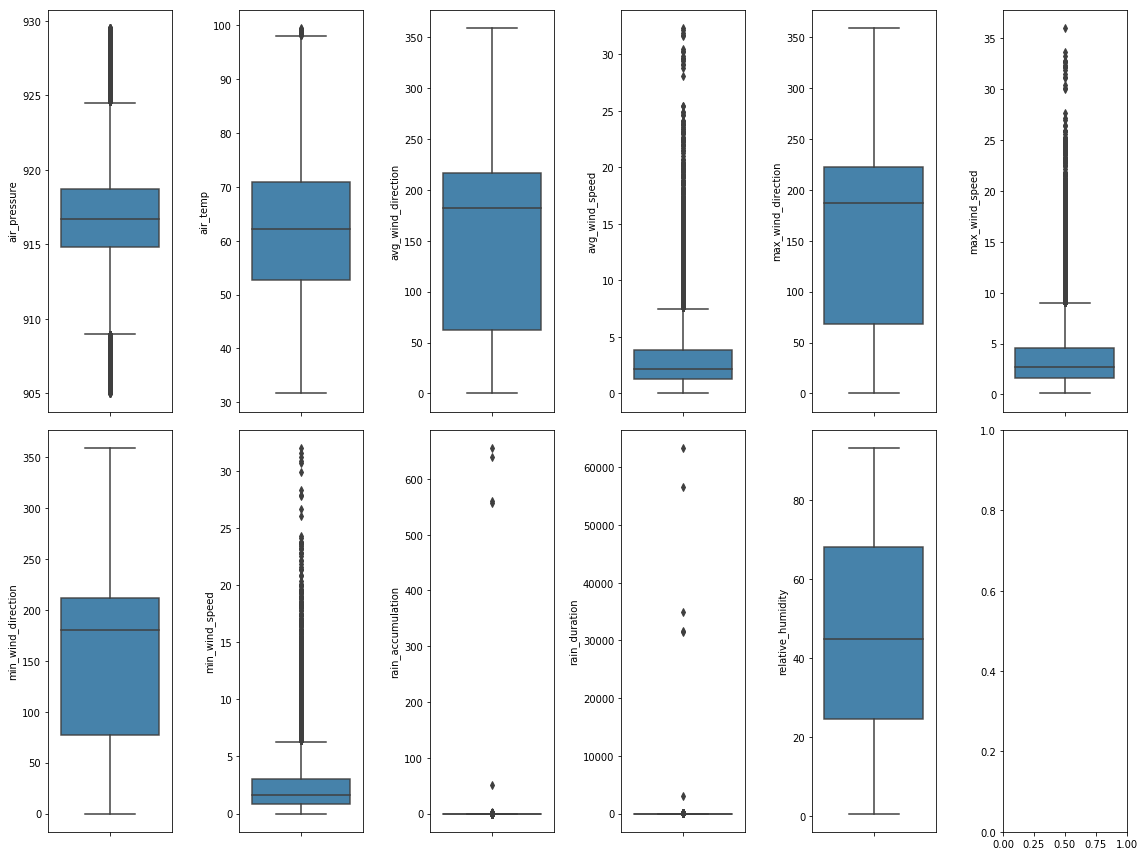

In [18]:
features = list(df.columns.values)
features.remove('hpwren_timestamp')

num_plots = len(features)
num_columns = 6
num_rows = math.ceil(num_plots/num_columns) # round up

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16,12))

if num_rows == 1:
    for index, name in enumerate(features):
        sns.boxplot(y=name, data=df, ax=axs[index], boxprops=dict(alpha=.9))
else:
    for index, name in enumerate(features):
        row = int(index / num_columns)
        col = index % num_columns
        sns.boxplot(y=name, data=df, ax=axs[row][col], boxprops=dict(alpha=.9))
plt.tight_layout()
plt.savefig(dataset_name + '_boxplots.png')  
plt.show()

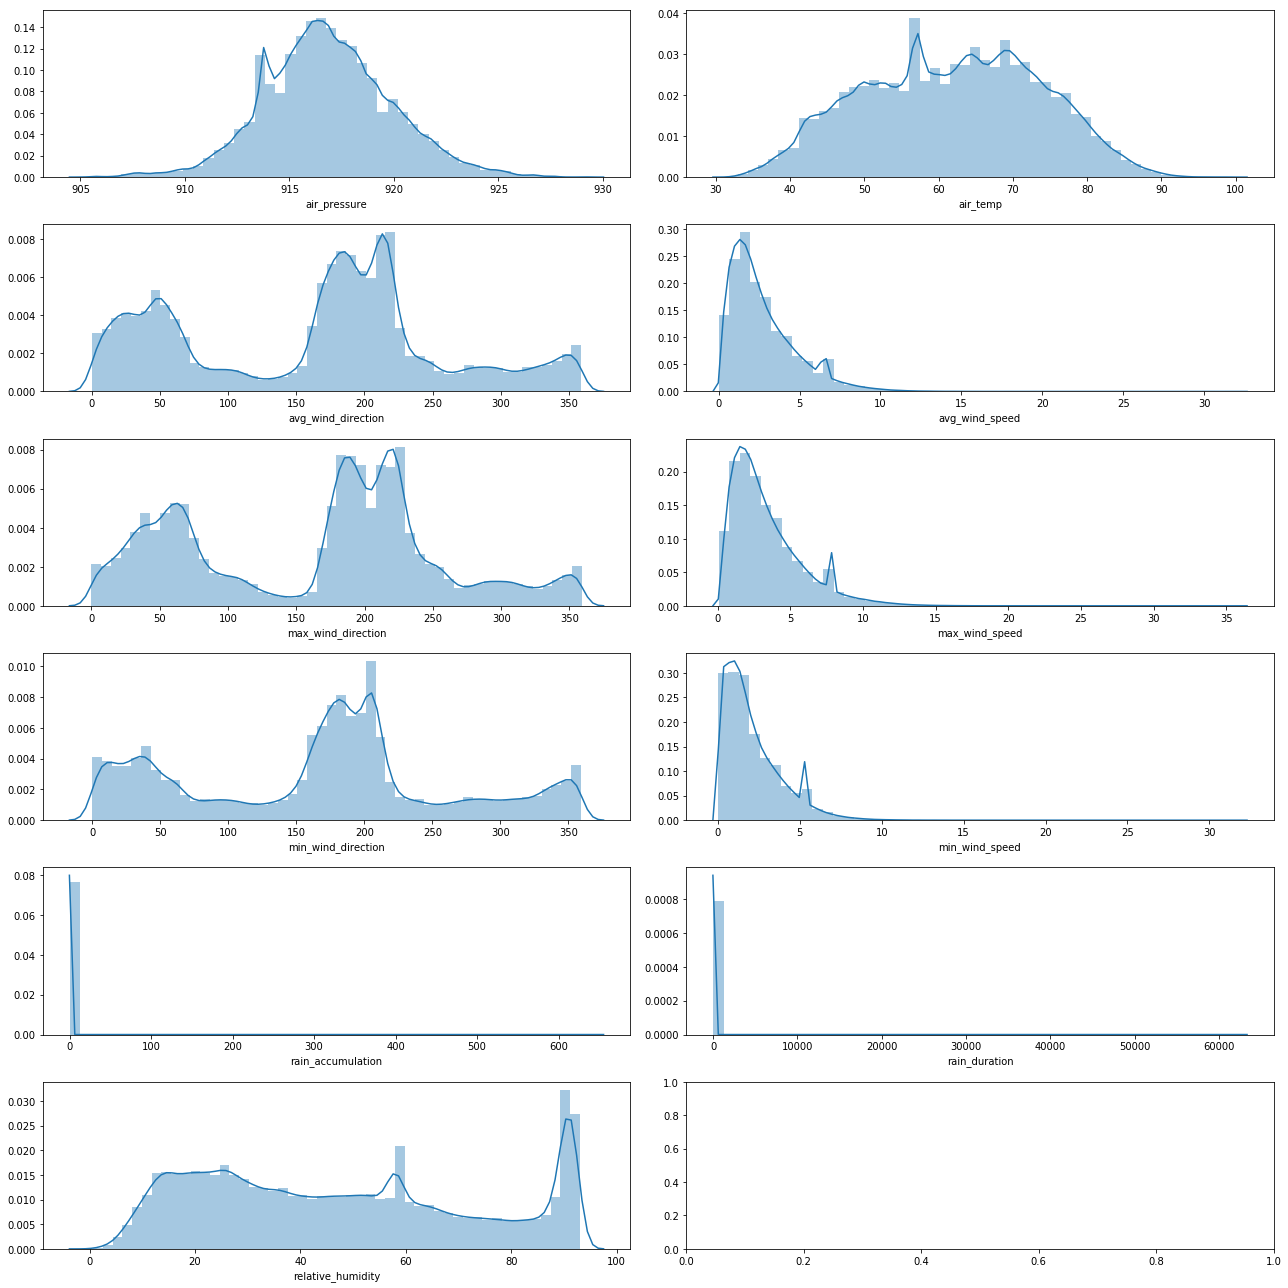

In [19]:
features = list(df.columns.values)
features.remove('hpwren_timestamp')

num_plots = len(features)
num_columns = 2
num_rows = math.ceil(num_plots/num_columns) # round up
label = 'class'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18,18))

if num_rows == 1:
    for index, name in enumerate(features):
        sns.distplot(df[name], ax=axs[index])
else:
    for index, name in enumerate(features):
        row = int(index / num_columns)
        col = index % num_columns
        sns.distplot(df[name], ax=axs[row][col])
plt.tight_layout()
plt.savefig(dataset_name + '_distplots_by_class.png')  
plt.show()

In [20]:
# compute pairwise correlation of the attributes
corr = df.corr()
corr

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
air_pressure,1.000000,0.046569,-0.195163,-0.079954,-0.218719,-0.062462,-0.139134,-0.098003,-0.000777,-0.006564,-0.375846
air_temp,0.046569,1.000000,-0.016620,-0.208988,-0.046383,-0.208484,0.033342,-0.200032,-0.000609,-0.006268,-0.620059
avg_wind_direction,-0.195163,-0.016620,1.000000,-0.031116,0.716316,-0.030637,0.622763,-0.035435,0.000061,0.000898,0.205828
avg_wind_speed,-0.079954,-0.208988,-0.031116,1.000000,0.017618,0.985009,-0.117807,0.970987,0.001759,0.006652,0.061139
max_wind_direction,-0.218719,-0.046383,0.716316,0.017618,1.000000,0.017504,0.421684,0.010341,0.000353,0.001653,0.241055
max_wind_speed,-0.062462,-0.208484,-0.030637,0.985009,0.017504,1.000000,-0.112538,0.925881,0.001728,0.007033,0.048773
min_wind_direction,-0.139134,0.033342,0.622763,-0.117807,0.421684,-0.112538,1.000000,-0.121161,-0.000339,-0.000453,0.129132
min_wind_speed,-0.098003,-0.200032,-0.035435,0.970987,0.010341,0.925881,-0.121161,1.000000,0.001719,0.005801,0.072226
rain_accumulation,-0.000777,-0.000609,0.000061,0.001759,0.000353,0.001728,-0.000339,0.001719,1.000000,0.927018,0.000585
rain_duration,-0.006564,-0.006268,0.000898,0.006652,0.001653,0.007033,-0.000453,0.005801,0.927018,1.000000,0.006934


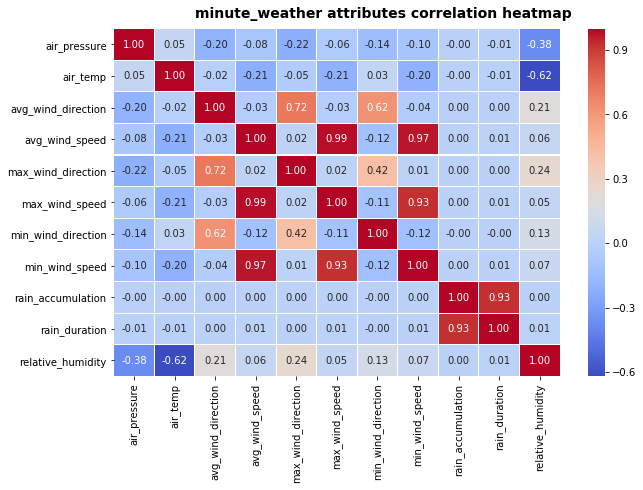

In [21]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle(dataset_name + ' attributes correlation heatmap', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_heatmap.png')  
plt.show()

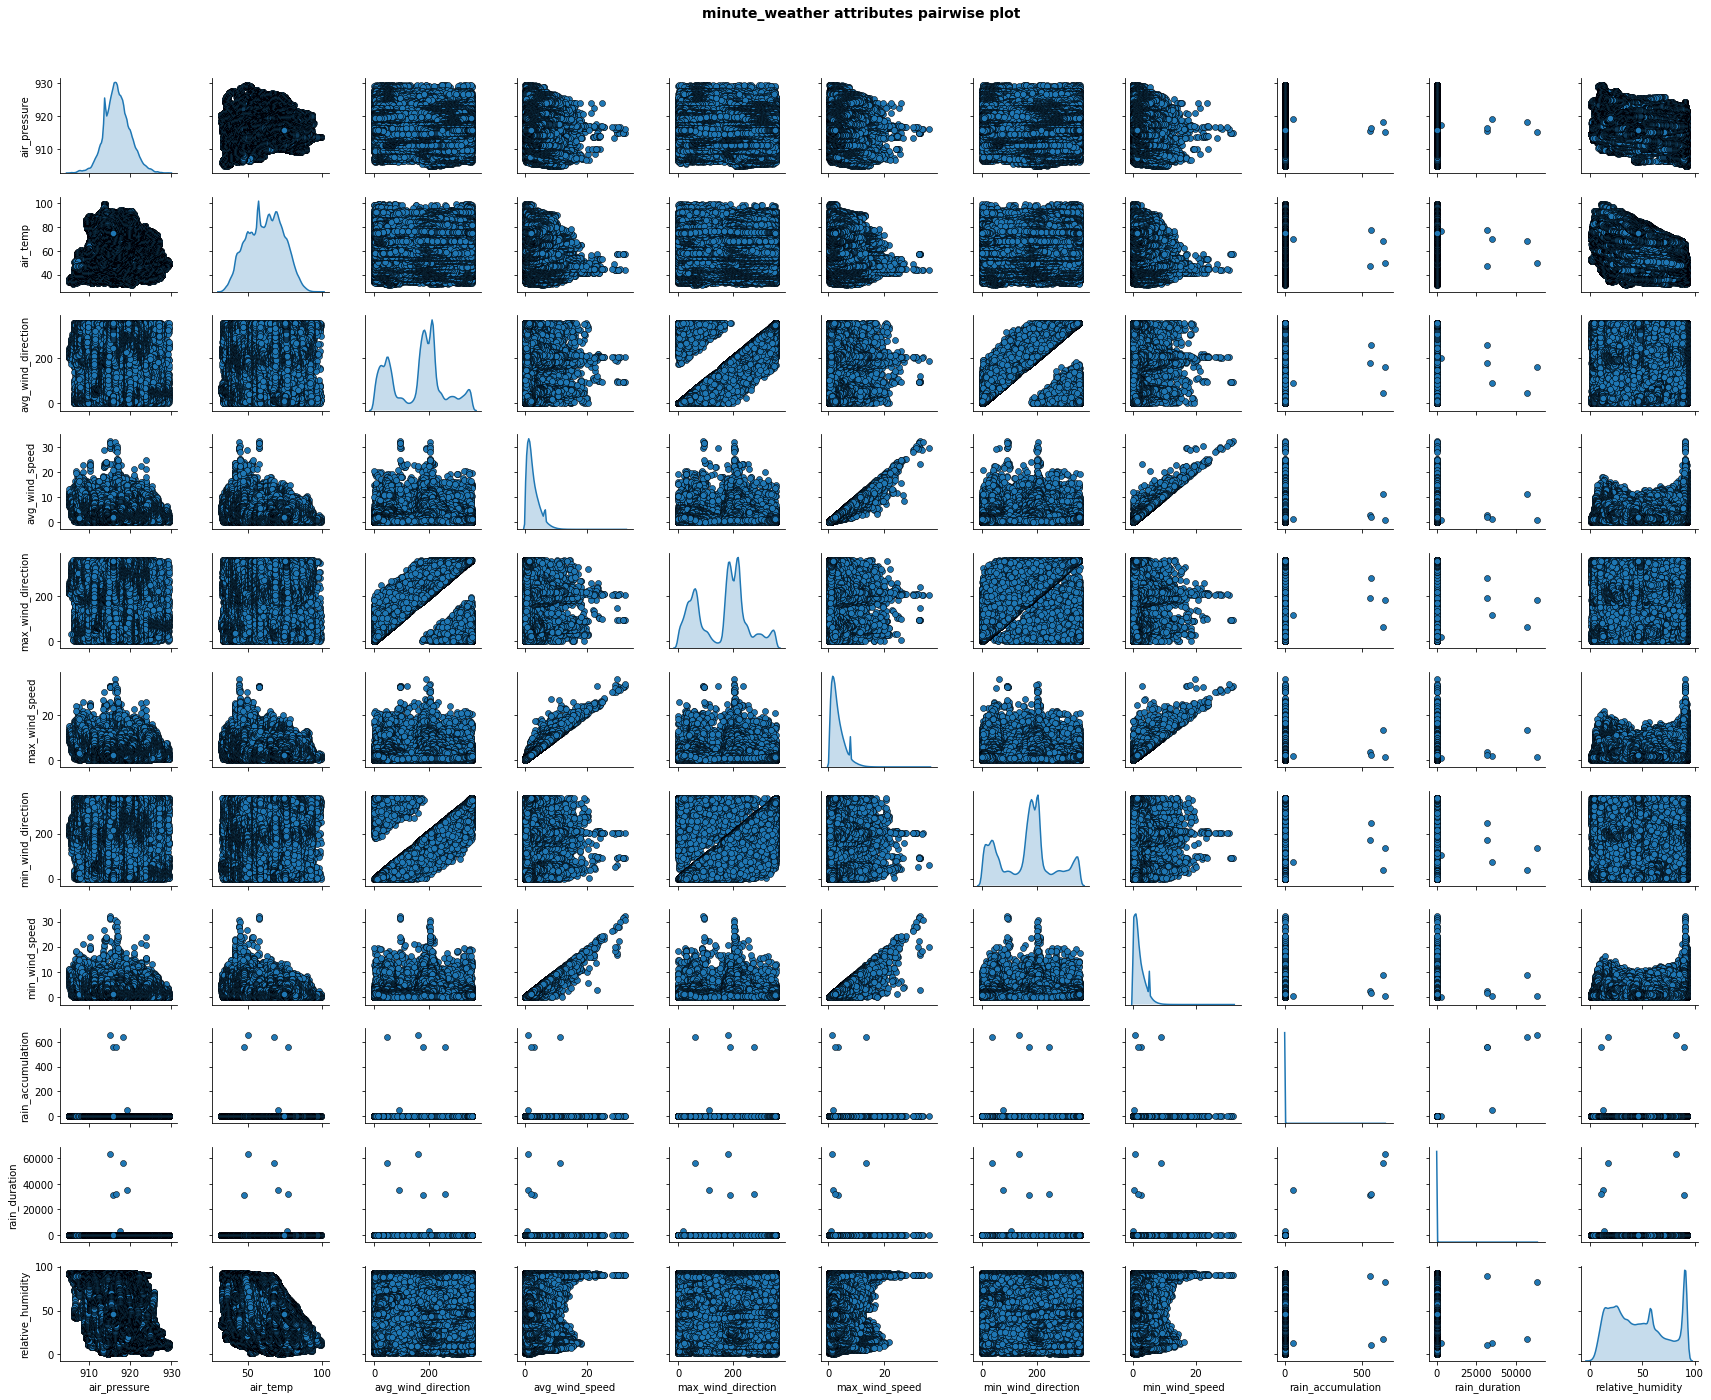

In [22]:
pp = sns.pairplot(df, height=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True), # "diag" adjusts/tunes the diagonal plots
                  diag_kind="kde") # use "kde" for diagonal plots

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle(dataset_name + ' attributes pairwise plot', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_pairplot.png')  
plt.show()